<a href="https://colab.research.google.com/github/gupta4327/car_price_prediction/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [75]:
#importing all necessary libraries 
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [76]:
#mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
#reading a csvfile in dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/pandas/dat/Car_details.csv"
dataset = pd.read_csv(file_path)

In [78]:
#view the dataset 
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [79]:
#checking basic info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Checking for duplicates and dropping them

In [80]:
#looking for number of duplicates
len(dataset[dataset.duplicated()])

1202

In [81]:
#dropping these duplicates from the dataset
dataset.drop_duplicates(keep="first",inplace =True)

Droppping all null values 

In [82]:
# DROPPING ALL NULL VALUES
dataset.dropna(inplace=True)

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


 If we see the datatype of max_power, engine and mileage are object. They can be converted to numerical quantities. So we,ll try to convert them in numeric units and mention their units in column headers

In [84]:
# converting mileage, engine, max_power from object dtype to float datatype
for col in ['mileage','engine','max_power']:
  unit = dataset[col][0].split(" ")[1]
  dataset[col] = dataset[col].str.split(" ",expand=True)[0]
  name = col + "(" + unit+ ")"
  dataset.rename(columns={col: name}, inplace =True)
  dataset[name] = dataset[name].astype('float64')

In [85]:
#checking for data conversion 
print(dataset['mileage(kmpl)'].dtype)
print(dataset['engine(CC)'].dtype)
print(dataset['max_power(bhp)'].dtype)

float64
float64
float64


In [86]:
# descriptive stat table for numerical column in dataset
dataset.describe()

,year,selling_price,km_driven,mileage(kmpl),engine(CC),max_power(bhp),seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


From above descriptive table if we look at mean and 50% that is median they vary quite high in some cases that means the distribution is skewed for these variable so we'll visualise the distribution through plots and they look for necessary actions. 

# **Feature analysis and Engineering**

In [87]:
#creating a list to store numerical features
numerical_features = list(dataset.describe().columns)
numerical_features

['year',
 'selling_price',
 'km_driven',
 'mileage(kmpl)',
 'engine(CC)',
 'max_power(bhp)',
 'seats']

##<b>Exploratory Data Analysis</b>

We'll check for data distribution of our numerical features 

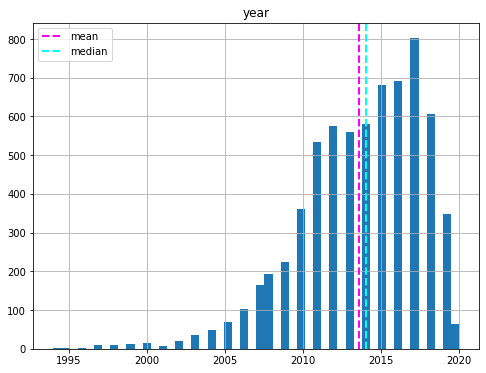

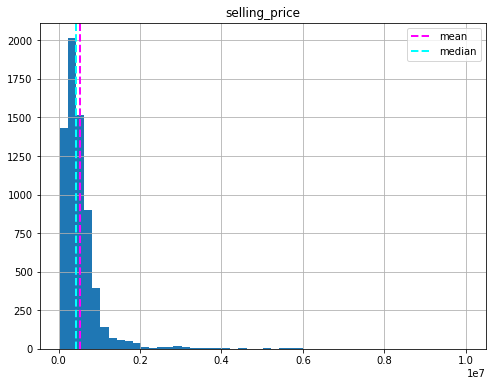

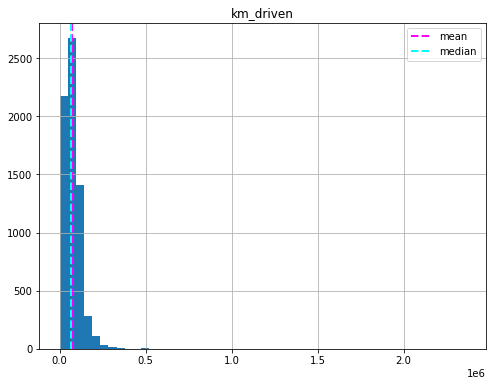

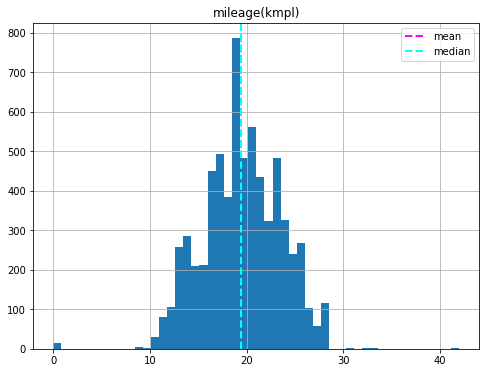

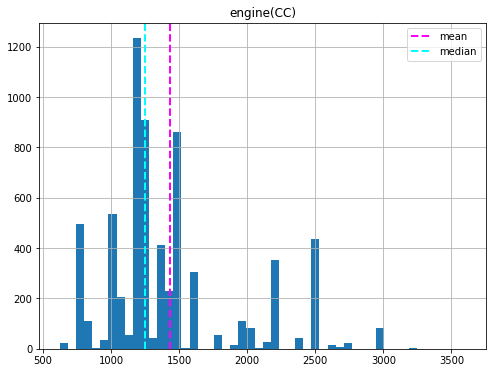

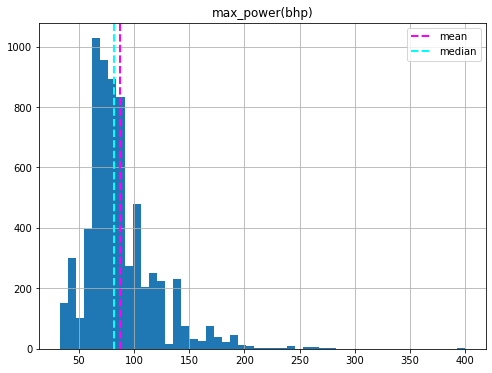

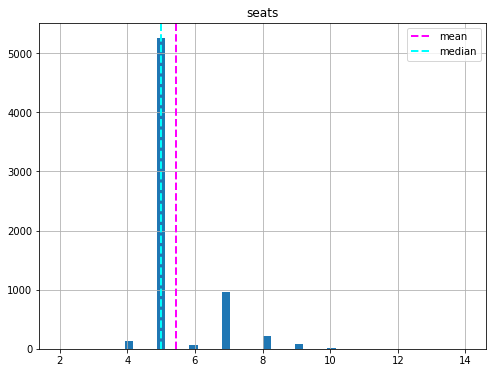

In [88]:
#checking for distribution of all numrical features
for col in numerical_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  feature = dataset[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth =2,label ='mean')
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth =2,label ='median')
  ax.set_title(col)
  ax.legend()


*we can see except year is left skewed, and milage is normally distributed We'll try to apply transformation to see which tranformation can help us in removing left skewness from year and also in removing right skewness on right skewed data* 

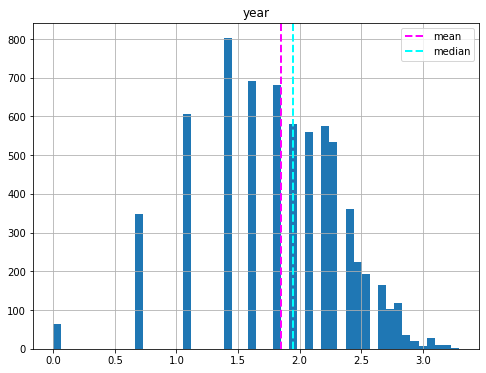

In [89]:
# Now we are trying to check if log transformation is useful in removing left skewness in year  
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
feature = np.log(max(dataset['year']+1)-dataset['year'])
feature.hist(bins=50, ax=ax)
ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth =2,label ='mean')
ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth =2,label ='median')
ax.set_title('year')
ax.legend()

*Log transformation is working quite well for a feature year*

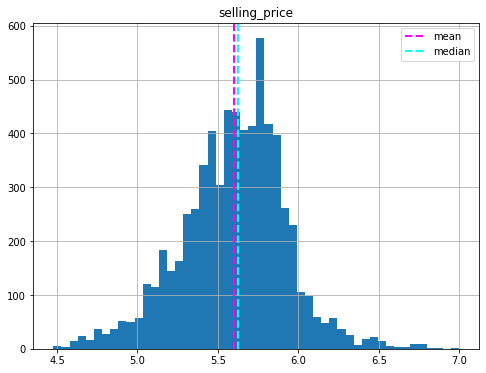

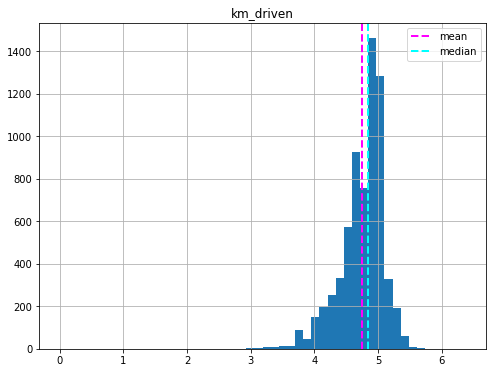

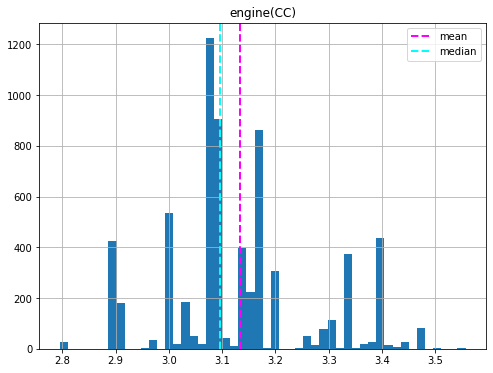

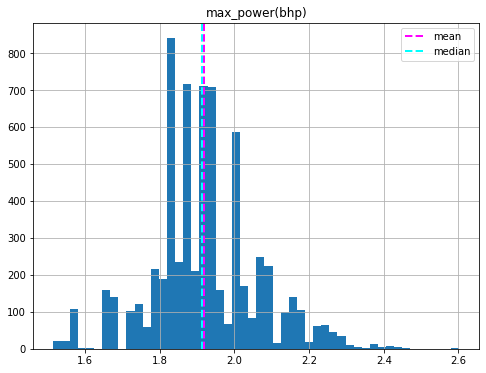

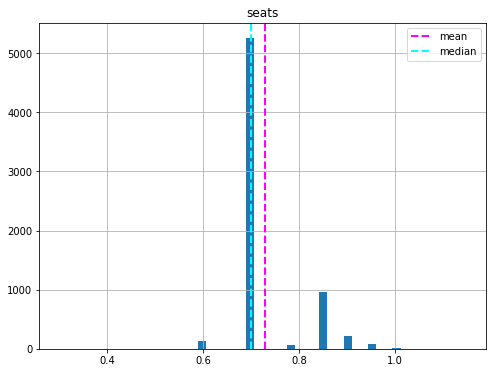

In [90]:
#checking log transformation for right skewed data
for col in numerical_features:
  if col not in ['year','mileage(kmpl)']:
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    feature = np.log10(dataset[col])
    feature.hist(bins=50, ax=ax)
    ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth =2,label ='mean')
    ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth =2,label ='median')
    ax.set_title(col)
    ax.legend()

*We can see that log transormation is working fine but once we'll try to remove the outliers and visualise the distribution* 

In [91]:
#We will now remove year inspite of that we'll introduce a car age
dataset['car_age'] = 2021- dataset['year']
numerical_features.append('car_age')
numerical_features.remove('year')
numerical_features

['selling_price',
 'km_driven',
 'mileage(kmpl)',
 'engine(CC)',
 'max_power(bhp)',
 'seats',
 'car_age']

*Now lets visualize the relation between our dependent and independent numerical variables using scatter plot*

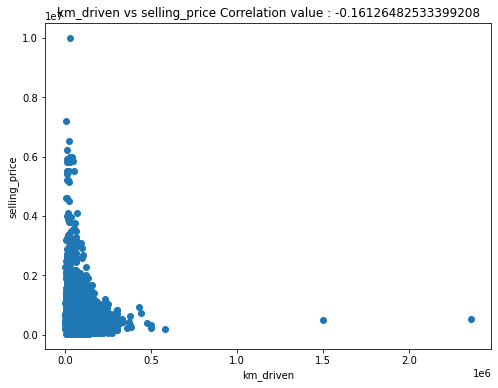

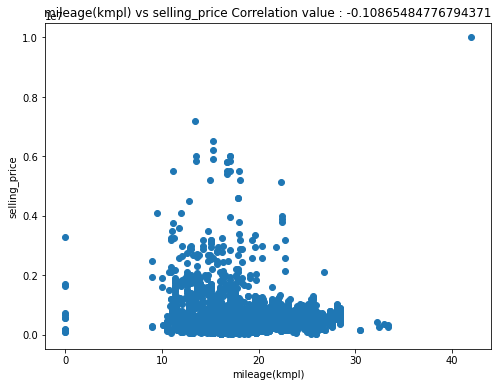

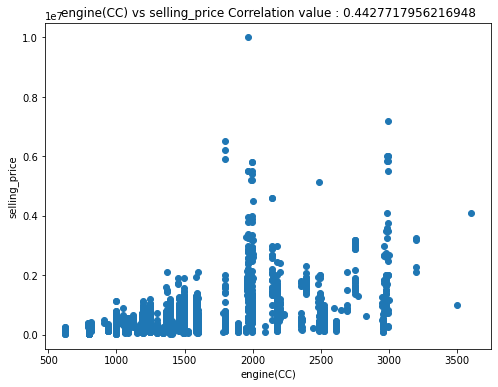

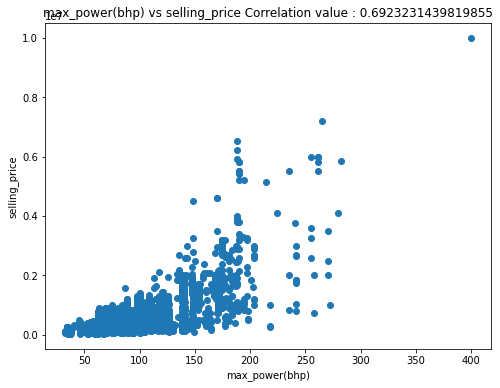

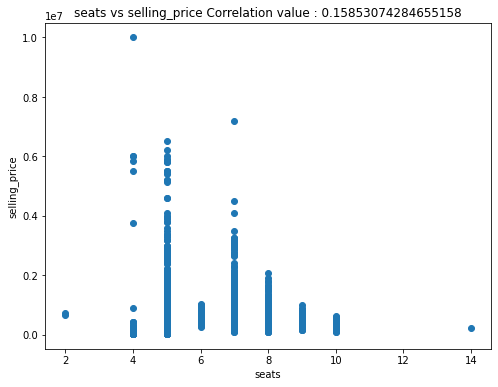

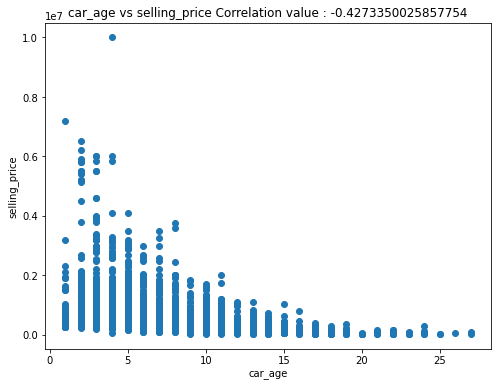

In [92]:
for col in numerical_features:
  if col not in ['selling_price']:
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    corr = feature.corr(label)
    ax.set_xlabel(col)
    ax.set_ylabel('selling_price')
    ax.set_title(col + ' vs selling_price Correlation value : ' + str(corr))
    plt.scatter(x=feature,y =label)

Now nextly we'll look for outliers in data and try to remove it 

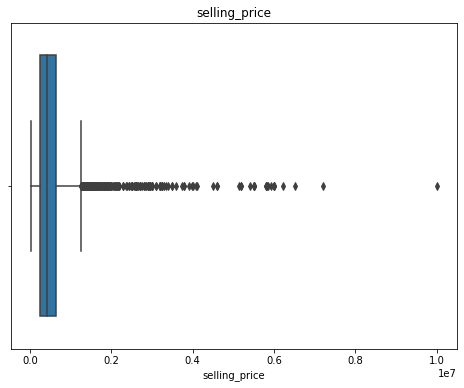

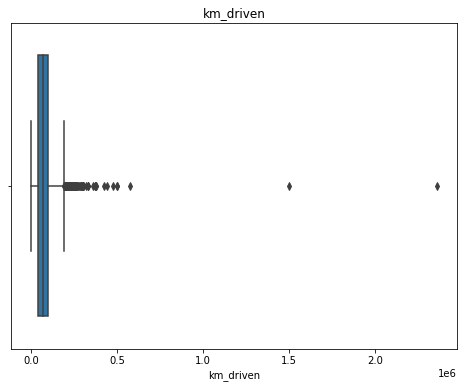

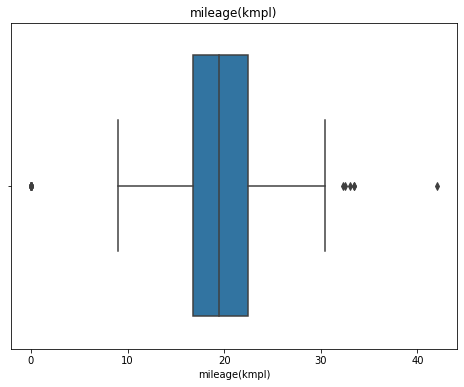

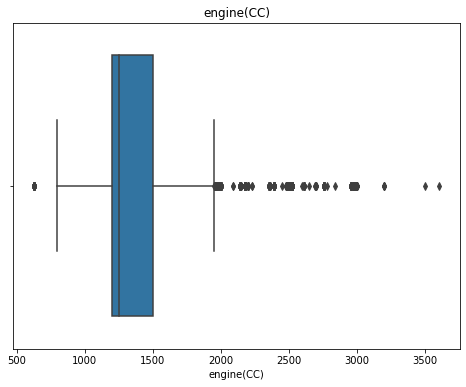

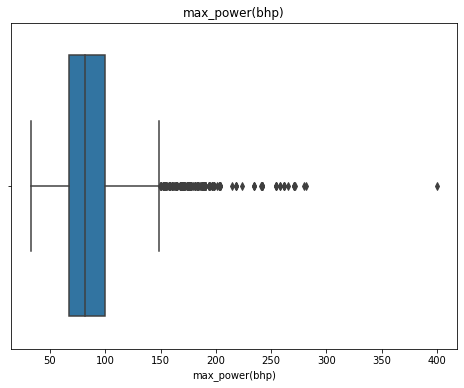

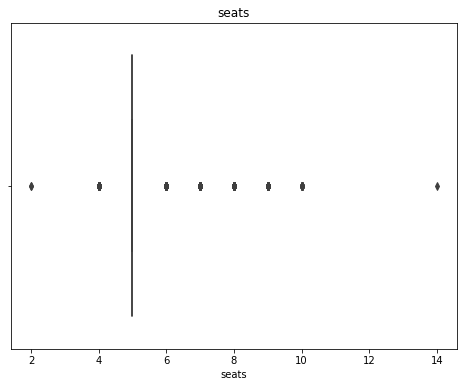

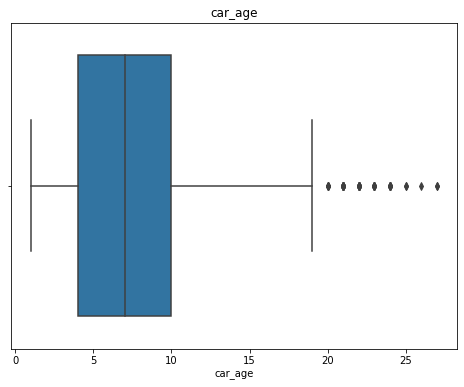

In [93]:
for col in numerical_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  feature=dataset[col]
  sns.boxplot(feature, ax=ax)
  ax.set_title(col) 

In [94]:
# removing outliers using quantile range
for col in numerical_features:
  if col not in ['seats']:
    q3 = dataset[col].quantile(0.75)
    q1 = dataset[col].quantile(0.25)
    iqr = q3-q1
    lwr_range = q1-(1.5*iqr)
    upr_range = q3+(1.5*iqr)
    dataset = dataset[(dataset[col] <= upr_range) & (dataset[col] >= lwr_range)]


We have ignored the seats here because after outlier treatment seat was lef with single value i.e. is 5 hence it will become more like a constant

In [95]:
#Visualising dataset
dataset.head(3)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,15


In [96]:
dataset.shape

(5093, 14)

In [97]:
#checking for unique value and their counts in seats nfeature
dataset['seats'].value_counts()

5.0     4661
7.0      301
4.0       56
6.0       40
8.0       29
10.0       3
9.0        2
14.0       1
Name: seats, dtype: int64

cars having seats 10,9 and 14 is way too less and it won't be effective. So we'll remove these from our dataset 

In [98]:
dataset = dataset[(dataset['seats']!=14) & (dataset['seats']!=9) & (dataset['seats']!=10)]

In [99]:
dataset.shape

(5087, 14)

Now we are done with numerical features EDA. Lets jump to categorical features. 

In [100]:
#Storing all variables other than numerical in categorical_features list
categorical_features = [feature for feature in list(dataset.columns) if feature not in ['year',
 'selling_price',
 'km_driven',
 'mileage(kmpl)',
 'engine(CC)',
 'max_power(bhp)','seats','car_age']]
categorical_features

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque']

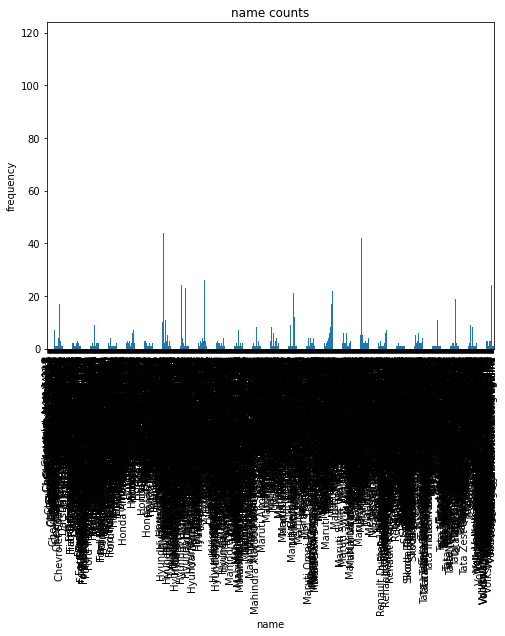

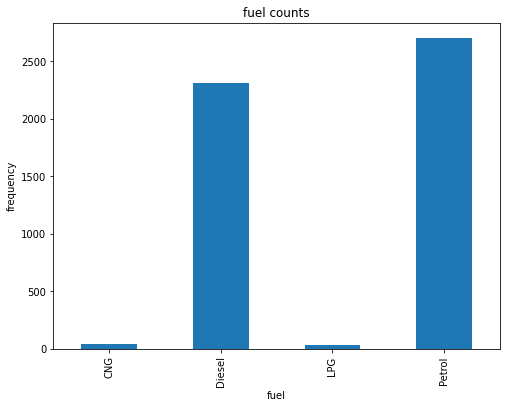

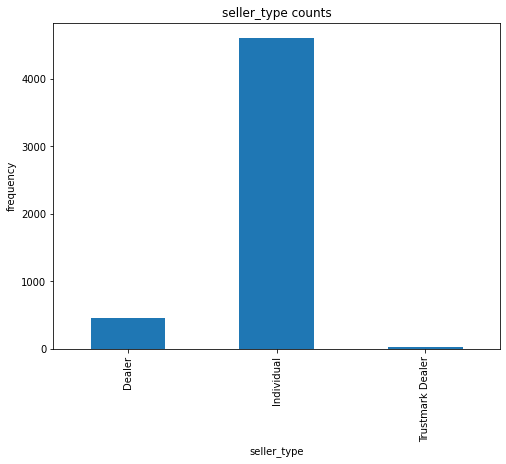

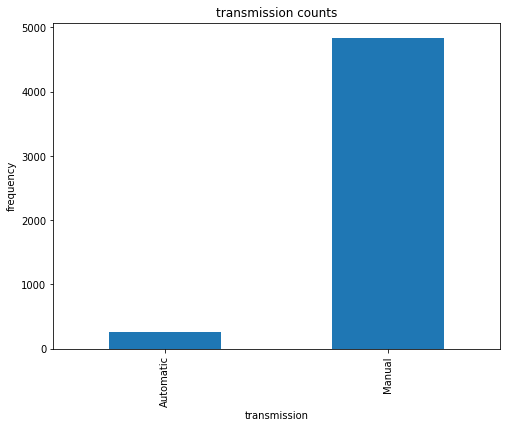

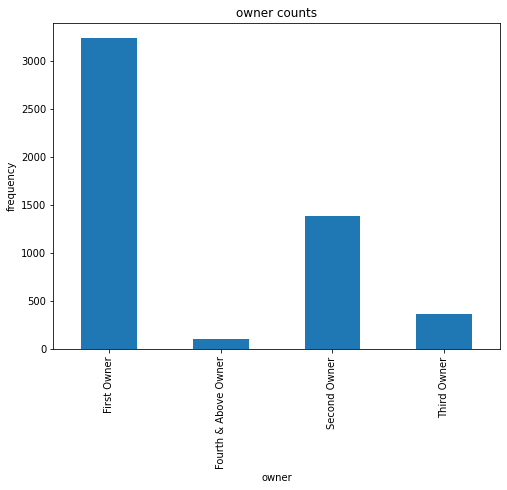

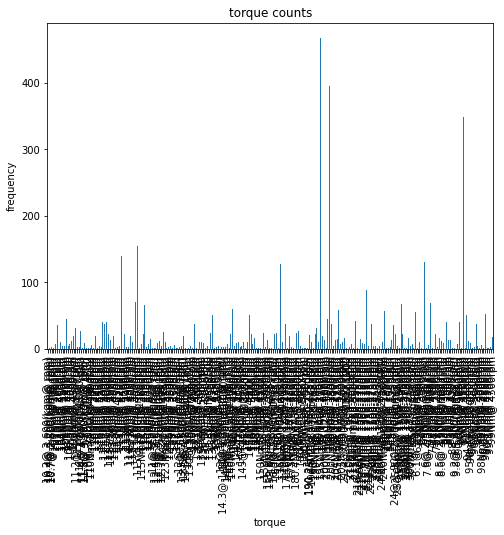

In [101]:
#checking for count bar plot for each categorical variable
for col in categorical_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  count = dataset[col].value_counts().sort_index()
  count.plot.bar(ax=ax)
  ax.set_title(col + ' ' + 'counts')
  ax.set_xlabel(col)
  ax.set_ylabel('frequency')
plt.show()


*Most of the cars runs on petrol and diesel*

*Most of the cares are manual*

*Mostly ca belongs to first owner*


Lets have a look on torque variable

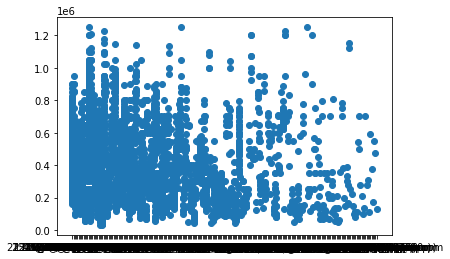

In [102]:
plt.scatter(dataset['torque'],dataset['selling_price'])

You might be thinking why i did not pick torque as numerical quantity.Its due to different measurement units along the same columns. Just revisualize once again dataset.head() and also scattter plot between selling price and torque seems out to be of not that much use from linear regression prespective.So we'lltry to drop torque column

In [103]:
categorical_features.remove('torque')

Name of car doesnt seem to be that useful but company name might be useful so we'll try to extract company name from name of a car and try to store it in company

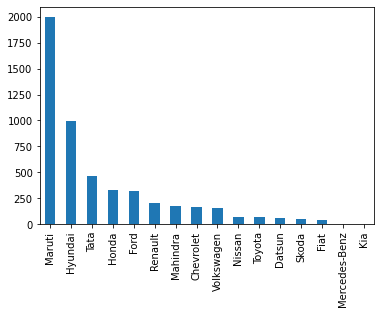

In [104]:
dataset['company'] = dataset['name'].str.split(" ", expand = True)[0]
count_cmpny = dataset['company'].value_counts().sort_values(ascending=False)
count_cmpny.plot.bar()
categorical_features.remove('name')

We will try to add one more feature an average price of car specific to a company 

In [105]:
df_avgprice = dataset.groupby('company').agg(average_price = ('selling_price',np.mean)).sort_values(by = 'average_price',ascending =False)

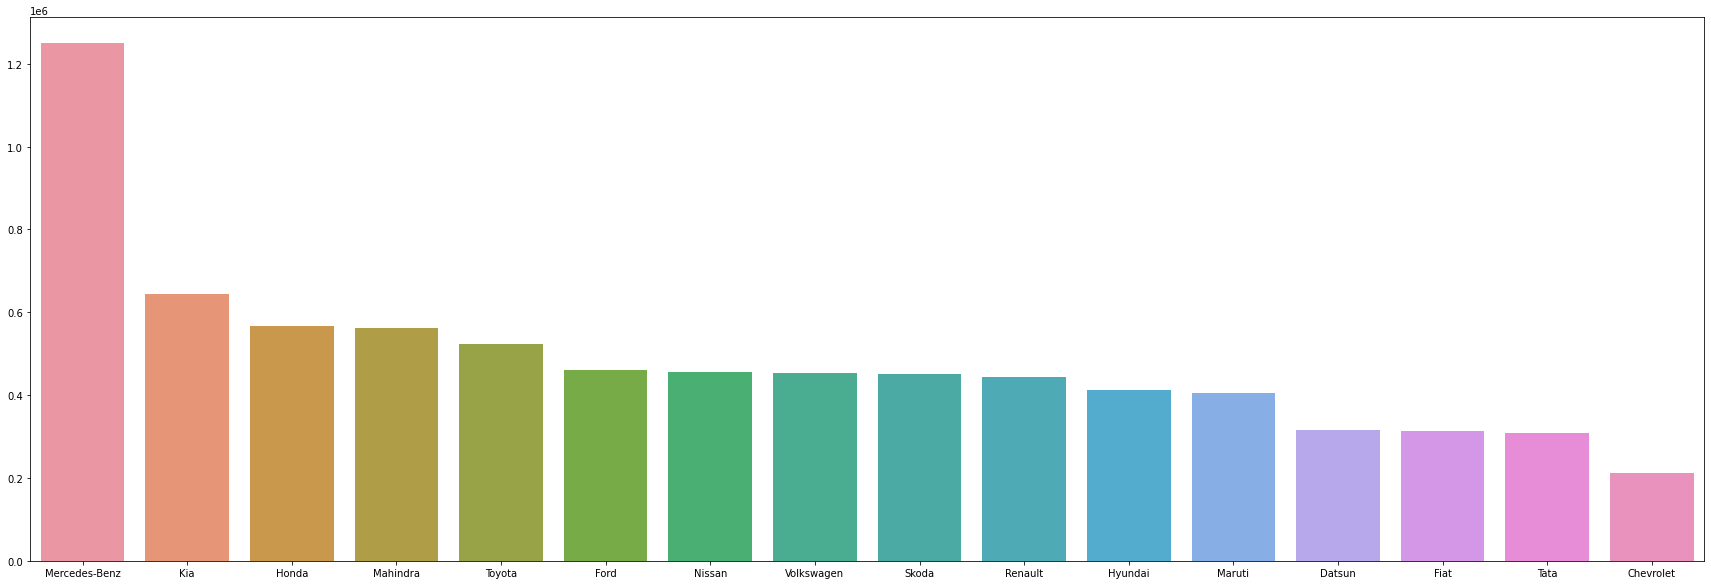

In [106]:
plt.figure(figsize=(30,10))
val = list(df_avgprice.values.reshape(df_avgprice.shape[0]))
cmpny = list(df_avgprice.index)
sns.barplot(x=cmpny,y=val)

In [107]:
dataset = dataset.merge(df_avgprice,on='company', how='left')

In [108]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bhp),torque,seats,car_age,company,average_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,7,Maruti,404806.337169
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,7,Skoda,450754.679245
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,15,Honda,566218.211656
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,11,Hyundai,411501.465795
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,14,Maruti,404806.337169


Text(0, 0.5, 'Selling Price')

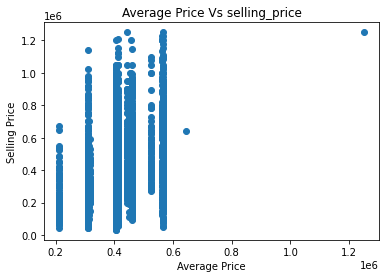

In [109]:
#visualise scatter plot of average price with our dependent variable selling price 
plt.scatter(dataset['average_price'],dataset['selling_price'])
plt.title('Average Price Vs selling_price')
plt.xlabel('Average Price')
plt.ylabel('Selling Price')

As from scatter plot and correlation coefficient we can see that average price is not too that associated with our dependent variable. We'll try to see if our model performs better with average price or not.

Now we'll try to visualize these categorical variables with respect to price on box plot to see their relation with our dependent variable

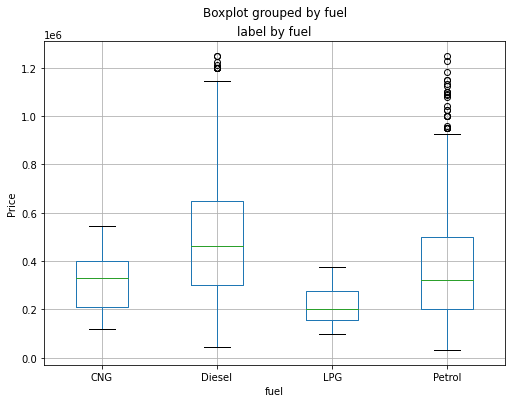

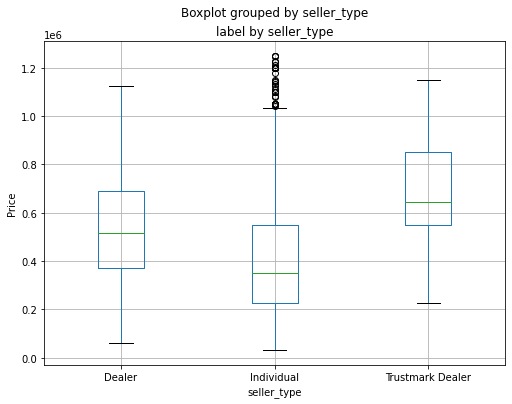

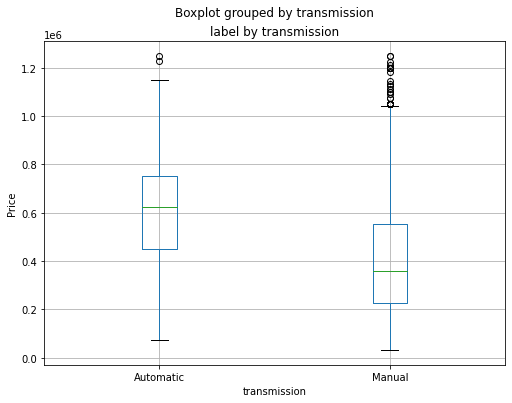

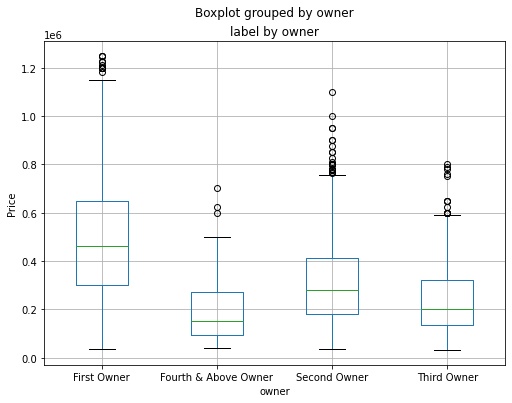

In [110]:
for col in categorical_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  dataset.boxplot(column='selling_price', by = col,ax=ax)
  ax.set_title('label by'+' '+col)
  ax.set_ylabel('Price')

In [111]:
dataset['owner'].value_counts()

First Owner             3236
Second Owner            1381
Third Owner              366
Fourth & Above Owner     104
Name: owner, dtype: int64

In [112]:
dataset['transmission'].value_counts()

Manual       4834
Automatic     253
Name: transmission, dtype: int64

In [113]:
dataset['fuel'].value_counts()

Petrol    2700
Diesel    2310
CNG         45
LPG         32
Name: fuel, dtype: int64

In [114]:
dataset['seller_type'].value_counts()

Individual          4604
Dealer               459
Trustmark Dealer      24
Name: seller_type, dtype: int64

Goal here to run these value counts is to check if there are any category having less than 20 observations. If there are some i'll delete them as they wont be useful in training

In [115]:
categorical_features

['fuel', 'seller_type', 'transmission', 'owner']

*Now we'll encode these categorical features and store them in a copy dataset*

In [116]:
dataset_cpy = dataset[numerical_features+categorical_features]

In [117]:
dataset_cpy.head()

,selling_price,km_driven,mileage(kmpl),engine(CC),max_power(bhp),seats,car_age,fuel,seller_type,transmission,owner
0,450000,145500,23.40,1248.0,74.00,5.0,7,Diesel,Individual,Manual,First Owner
1,370000,120000,21.14,1498.0,103.52,5.0,7,Diesel,Individual,Manual,Second Owner
2,158000,140000,17.70,1497.0,78.00,5.0,15,Petrol,Individual,Manual,Third Owner
3,225000,127000,23.00,1396.0,90.00,5.0,11,Diesel,Individual,Manual,First Owner
4,130000,120000,16.10,1298.0,88.20,5.0,14,Petrol,Individual,Manual,First Owner


In [118]:
dummies = pd.get_dummies(dataset_cpy[categorical_features], prefix = categorical_features, drop_first = True)
dataset_cpy = pd.concat([dataset_cpy, dummies], axis =1) 

In [119]:
dataset_cpy.drop(columns=categorical_features,inplace = True)

In [120]:
dataset_cpy.head()

,selling_price,km_driven,mileage(kmpl),engine(CC),max_power(bhp),seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,7,1,0,0,1,0,1,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,7,1,0,0,1,0,1,0,1,0
2,158000,140000,17.70,1497.0,78.00,5.0,15,0,0,1,1,0,1,0,0,1
3,225000,127000,23.00,1396.0,90.00,5.0,11,1,0,0,1,0,1,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,14,0,0,1,1,0,1,0,0,0


*Now looking for correlation among the variables*

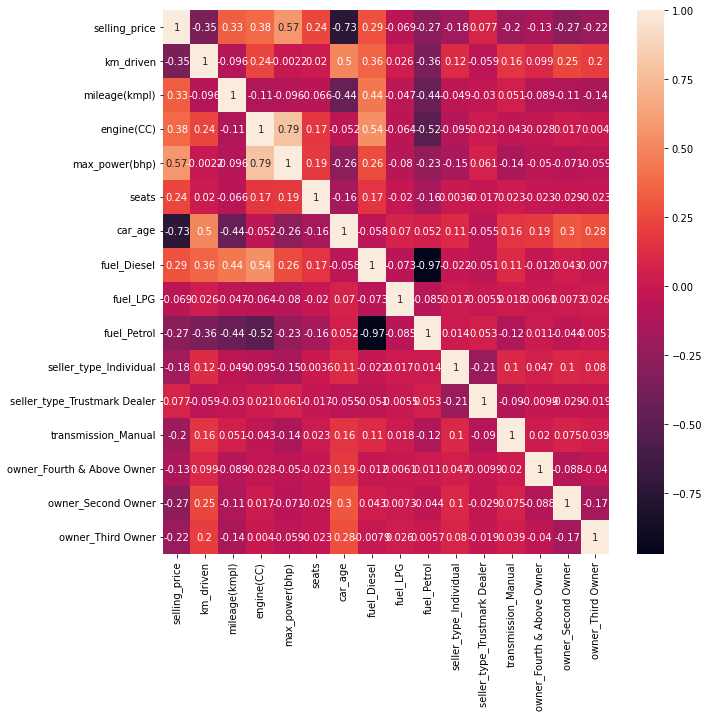

In [121]:
plt.figure(figsize=(10,10))
corr = dataset_cpy.corr()
sns.heatmap(corr,annot= True)

above heatmap tells us -
* Selling price(dependent variable) is highly correlated with car age and max_power(bhp)
*independent variable max_power and engine (CC) is highly correlated with each other and also car age and km_driven
* Now we'll look for multicolinearity among independent variable using Variance inflation factor(VIF)

In [122]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(a): 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = a.columns
   vif["VIF"] = [variance_inflation_factor(a.values, j) for j in range(a.shape[1])]
 
   return(vif)

In [123]:
calc_vif(dataset_cpy.drop(columns='selling_price'))

,variables,VIF
0,km_driven,6.797742
1,mileage(kmpl),44.908113
2,engine(CC),135.142175
3,max_power(bhp),80.972587
4,seats,75.069527
5,car_age,9.693795
6,fuel_Diesel,47.315968
7,fuel_LPG,1.533747
8,fuel_Petrol,45.574396
9,seller_type_Individual,11.285654


* Engine has too high VIF score so we'll drop engine

In [124]:
# removing engine from cpy dataset   
dataset_cpy.drop(columns='engine(CC)',inplace= True)

In [125]:
#checking for VIF again after removing engine
calc_vif(dataset_cpy.drop(columns='selling_price'))

,variables,VIF
0,km_driven,6.770754
1,mileage(kmpl),44.629324
2,max_power(bhp),26.257470
3,seats,72.082342
4,car_age,9.189234
5,fuel_Diesel,44.570072
6,fuel_LPG,1.522943
7,fuel_Petrol,44.944099
8,seller_type_Individual,11.229648
9,seller_type_Trustmark Dealer,1.058888


* Among mileage and max_power max_power is highly correlated with our dependent variable. So we'll keep max_power and drop mileage

In [126]:
#removing mileage from cpy dataset
dataset_cpy.drop(columns='mileage(kmpl)',inplace= True)

In [127]:
#checking VIF after mileage and engine removal
calc_vif(dataset_cpy.drop(columns='selling_price'))

,variables,VIF
0,km_driven,6.767348
1,max_power(bhp),25.847042
2,seats,67.182801
3,car_age,8.562909
4,fuel_Diesel,33.855000
5,fuel_LPG,1.423004
6,fuel_Petrol,36.409513
7,seller_type_Individual,11.081082
8,seller_type_Trustmark Dealer,1.058211
9,transmission_Manual,20.021638


In [128]:
#similary among max_power and seats we_ll remove seats as its less correlated with selling_price
dataset_cpy.drop(columns='seats',inplace= True)

In [129]:
calc_vif(dataset_cpy.drop(columns='selling_price'))

,variables,VIF
0,km_driven,6.752832
1,max_power(bhp),22.775705
2,car_age,8.548245
3,fuel_Diesel,23.456655
4,fuel_LPG,1.273087
5,fuel_Petrol,24.264224
6,seller_type_Individual,10.723991
7,seller_type_Trustmark Dealer,1.057595
8,transmission_Manual,18.757260
9,owner_Fourth & Above Owner,1.114991


In [130]:
dataset_cpy.drop(columns='transmission_Manual',inplace= True)

In [131]:
calc_vif(dataset_cpy.drop(columns='selling_price'))

,variables,VIF
0,km_driven,6.729413
1,max_power(bhp),22.758622
2,car_age,8.402376
3,fuel_Diesel,18.789613
4,fuel_LPG,1.210526
5,fuel_Petrol,19.413045
6,seller_type_Individual,10.407508
7,seller_type_Trustmark Dealer,1.056453
8,owner_Fourth & Above Owner,1.114327
9,owner_Second Owner,1.746747


Now we have all values of VIF less than 10 and it looks good so lets go for further analysis

In [132]:
dataset_cpy.drop(columns='fuel_Diesel',inplace= True)

In [133]:
calc_vif(dataset_cpy.drop(columns='selling_price'))

,variables,VIF
0,km_driven,6.647385
1,max_power(bhp),8.198231
2,car_age,7.801144
3,fuel_LPG,1.024111
4,fuel_Petrol,2.504594
5,seller_type_Individual,8.694010
6,seller_type_Trustmark Dealer,1.053805
7,owner_Fourth & Above Owner,1.110655
8,owner_Second Owner,1.740869
9,owner_Third Owner,1.303154


In [134]:
#update numerical features
numerical_features=['km_driven','max_power(bhp)','car_age','selling_price']

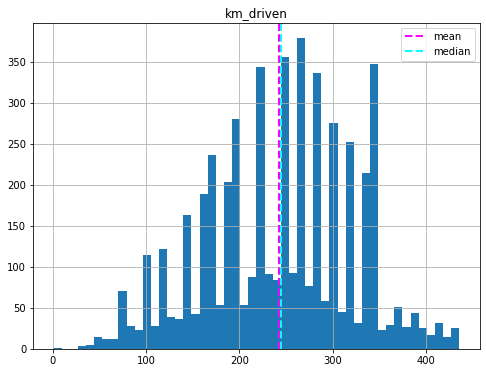

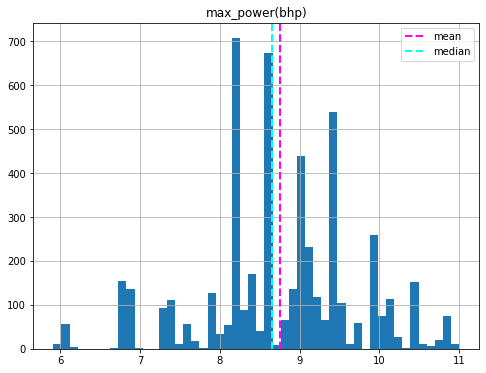

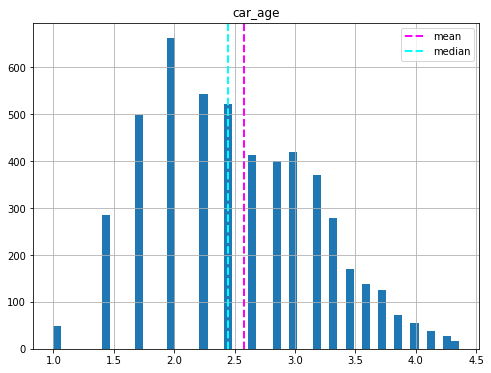

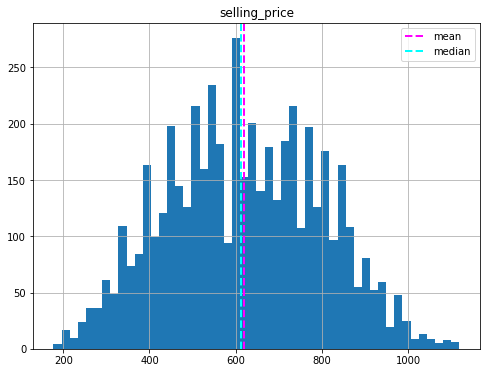

In [135]:
for col in numerical_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  feature = np.sqrt(dataset_cpy[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth =2,label ='mean')
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth =2,label ='median')
  ax.set_title(col)
  ax.legend()

In [136]:
# as seen earlier sqrt transformation makes the distribution of features normal so we took sqrt of numerical variable
for col in numerical_features:
  dataset_cpy[col] = np.sqrt(dataset_cpy[col])


In [137]:
#descriptive stats of features
dataset_cpy.describe()

,selling_price,km_driven,max_power(bhp),car_age,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
count,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000
mean,618.399478,243.181315,8.761511,2.579684,0.006291,0.530765,0.905052,0.004718,0.020444,0.271476,0.071948
std,180.092014,79.530414,0.963531,0.693373,0.079071,0.499102,0.293172,0.068532,0.141528,0.444765,0.258427
min,177.493662,1.000000,5.916080,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,484.767986,187.082869,8.191459,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,612.372436,244.948974,8.660254,2.449490,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,758.287544,300.000000,9.407444,3.162278,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1118.033989,435.889894,11.000000,4.358899,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


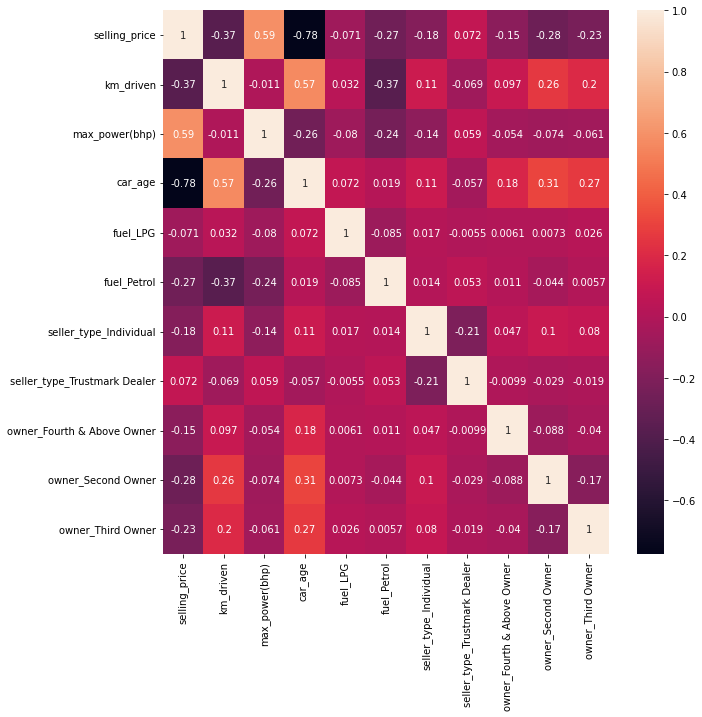

In [138]:
#again visualising corr matrix
plt.figure(figsize=(10,10))
corr = dataset_cpy.corr()
sns.heatmap(corr,annot= True)

In [139]:
scale = StandardScaler()
dataset_cpy[['km_driven','max_power(bhp)','car_age']] = scale.fit_transform(dataset_cpy[['km_driven','max_power(bhp)','car_age']])

In [140]:
#segregating independent variables
x = dataset_cpy[[i for i in dataset_cpy.columns if i not in ['selling_price']]]

In [141]:
#storing dependent variable in y 
y = dataset_cpy['selling_price']

In [142]:
#performing train test split with test size of 20% 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =5)

In [143]:
#xtrain visualize
x_train[0:10]

,km_driven,max_power(bhp),car_age,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
2215,0.148004,-0.591686,0.840313,0,1,1,0,0,1,0
4909,-0.543007,-0.165227,0.095293,0,0,1,0,0,0,0
444,-0.246150,-0.165227,-0.836117,0,0,1,0,0,0,0
3936,0.714497,1.212579,-0.187788,0,0,1,0,0,0,0
4107,0.269028,1.212579,-0.187788,0,0,1,0,0,0,0
169,0.385802,-0.914596,0.840313,0,1,1,0,0,0,0
3624,0.269028,-0.534856,0.840313,0,0,1,0,0,1,0
4937,0.269028,-0.171262,1.062938,0,0,1,0,0,1,0
2987,-0.543007,0.642825,-1.222598,0,0,0,0,0,0,0
2553,-0.450399,-0.591686,0.358778,0,1,1,0,0,1,0


In [145]:
# creating a model with name regressor and fitting it to our training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [146]:
#checking for regression coefficients
print('Coefficients of regression are : ' ,regressor.coef_)

Coefficients of regression are :  [ -12.13812732   65.60862991 -107.5424185   -20.90308132  -71.7358846
  -22.80902243   34.77904407  -27.67349763  -23.34056604  -28.75017165]


In [147]:
#checking for training prediction 
y_pred_train = regressor.predict(x_train)

In [148]:
#training score
print(f'Training score is : {round(regressor.score(x_train,y_train)*100,2)} %')

Training score is : 79.56 %


We can see that trainig score has reached 79.61 % which is quite good

Now we'll look for mean square and root mean square error for our training and testing data 

In [149]:
#checking for test prediction 
y_pred_test = regressor.predict(x_test)

In [150]:
print(f'Mean Square error(MSE) for train data is {round(mean_squared_error(y_train**2,y_pred_train**2),2)}')
print(f'Mean Square error(MSE) for test data is {round(mean_squared_error(y_test**2,y_pred_test**2),2)}')
print(f' Root Mean Square error(MSE) for train data is {round(np.sqrt(mean_squared_error(y_train**2,y_pred_train**2)),2)}')
print(f' Root Mean Square error(MSE) for train data is {round(np.sqrt(mean_squared_error(y_test**2,y_pred_test**2)),2)}')

Mean Square error(MSE) for train data is 11631285677.0
Mean Square error(MSE) for test data is 10818247733.22
 Root Mean Square error(MSE) for train data is 107848.44
 Root Mean Square error(MSE) for train data is 104010.81


R2 score and adjusted R2 score for our test data 

In [151]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test**2,y_pred_test**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test**2,y_pred_test**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.7914850156271112
Adjusted R2 :  0.7894143603701809


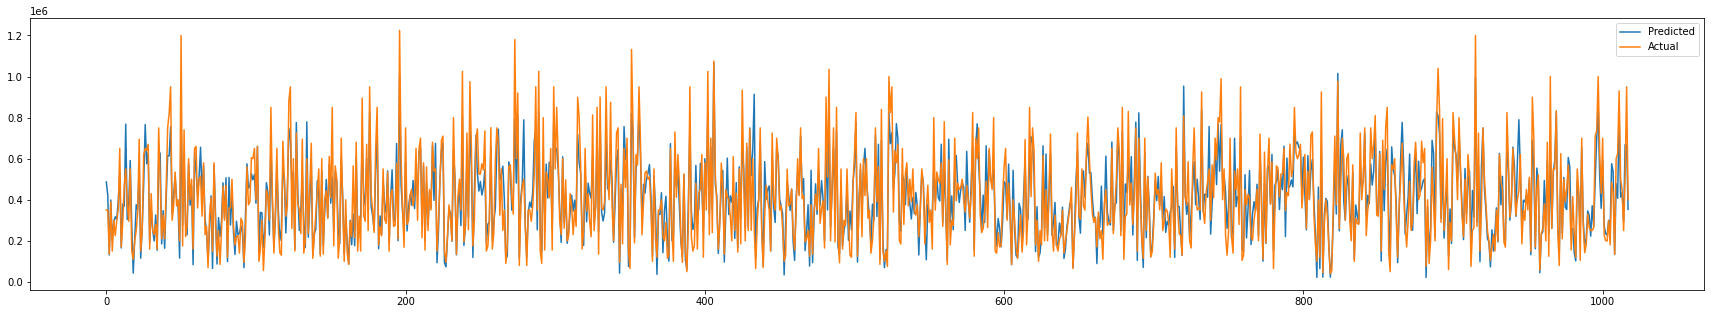

In [152]:
#visualising variation in predicted and actual price of our test data 
plt.figure(figsize=(30,5))
plt.plot(y_pred_test**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

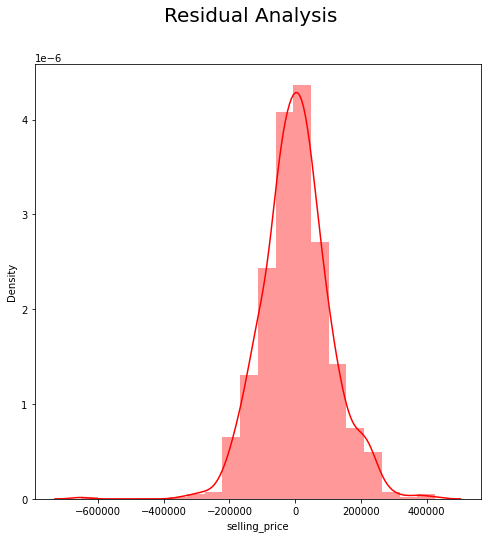

In [153]:
#checking for distribution of residuals 
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot(((y_test**2)- (y_pred_test**2)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

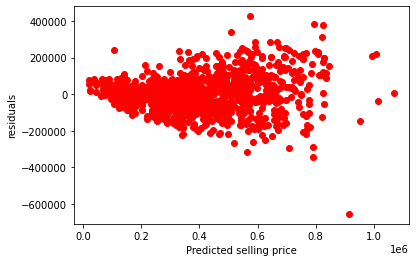

In [154]:
#checking for hetrosceadicity 
### Heteroscadacity
plt.scatter((y_pred_test**2),((y_test**2)- (y_pred_test**2)),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

Still there are some predictions thats quite different than actual price We'll try to fit lasso regression to see if that can help in reducing error further and making predictions better 

In [155]:
#importing lasso from sklearn 
from sklearn.linear_model import Lasso
#creating a lasso model and fitting training data to it 
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [156]:
#checking for A TRAINING SCORE OF LASS0
print(f'Traing score for lasso model is {round(lasso.score(x_train, y_train)*100,2)} %')

Traing score for lasso model is 79.56 %


In [157]:
print('coefficients for our lasso model is : ',lasso.coef_)

coefficients for our lasso model is :  [ -12.13801435   65.60883571 -107.54297131  -20.88271883  -71.73483178
  -22.80930509   34.75441402  -27.66748075  -23.33930975  -28.74776963]


We can see that traing score for lasso is is similar to Normal linear regression model hence there is no change. Now we'll try hyperparameter tuning and cross validation for lasso model to see if that can increase our model performance 

In [158]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,0.0006]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014, 0.0006]},
             scoring='neg_mean_squared_error')

In [159]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -6691.5738360109335


Best alpha is coming out to be 0.0001 that we have already used so lasso is not helpful in increasing our model performance

In [160]:
# Predicting the Test set results
y_pred_lasso = regressor.predict(x_test)

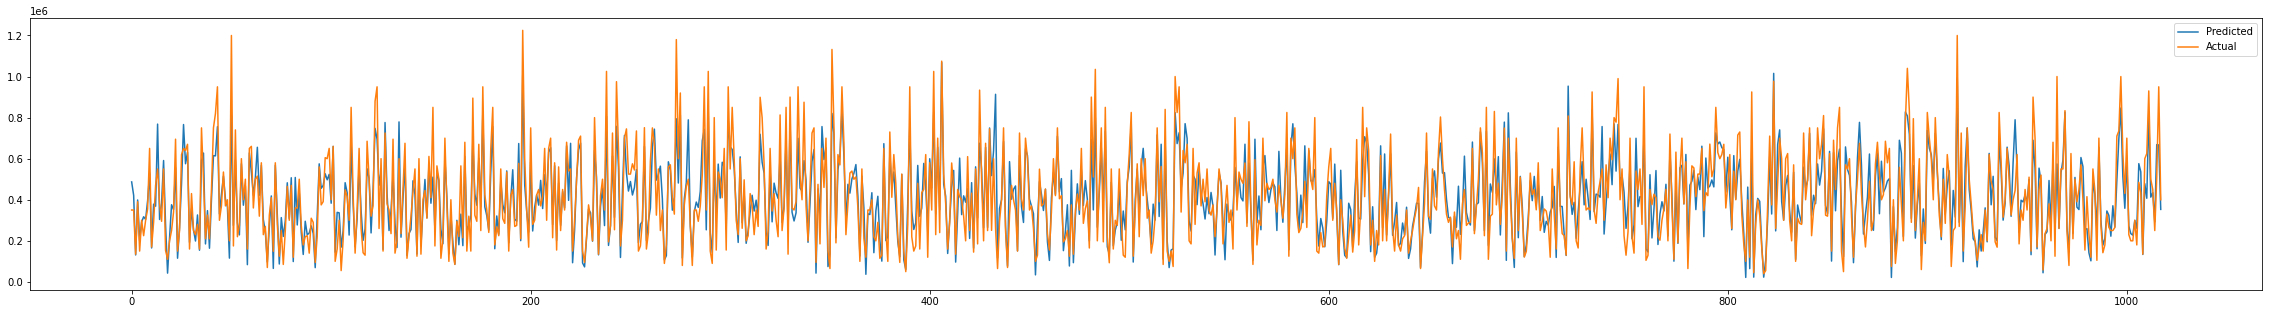

In [161]:
plt.figure(figsize=(40,5))
plt.plot(y_pred_lasso**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

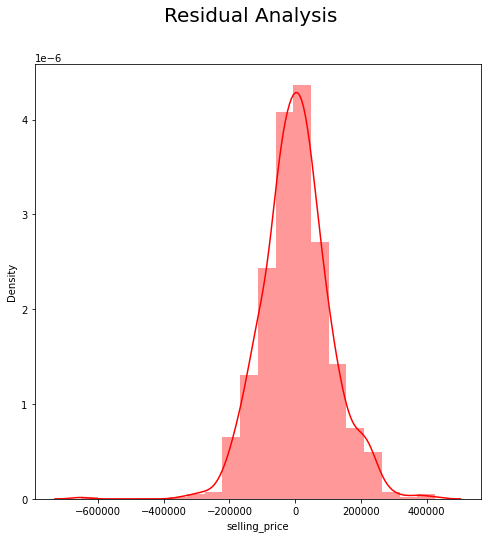

In [162]:
#checking for distribution of residuals 
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot(((y_test**2)- (y_pred_lasso**2)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

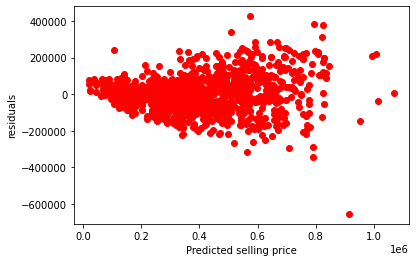

In [163]:
#checking for hetrosceadicity 
### Heteroscadacity
plt.scatter((y_pred_lasso**2),((y_test**2)- (y_pred_test**2)),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

In [164]:
MSE  = mean_squared_error(y_test**2, y_pred_lasso**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test**2, y_pred_lasso**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test**2, y_pred_lasso**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 10818247733.22035
RMSE : 104010.8058483365
R2 : 0.7914850156271112
Adjusted R2 :  0.7894143603701809


We have checked and seen that lidgre regression model is not helpful in increasing our model performance

In [165]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100, 0.1,0.3,0.6,0.09]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.1, 0.3, 0.6, 0.09]},
             scoring='neg_mean_squared_error')

In [166]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -6690.154373601622


In [167]:
#predicting test set result
y_pred_ridge = ridge_regressor.predict(x_test)

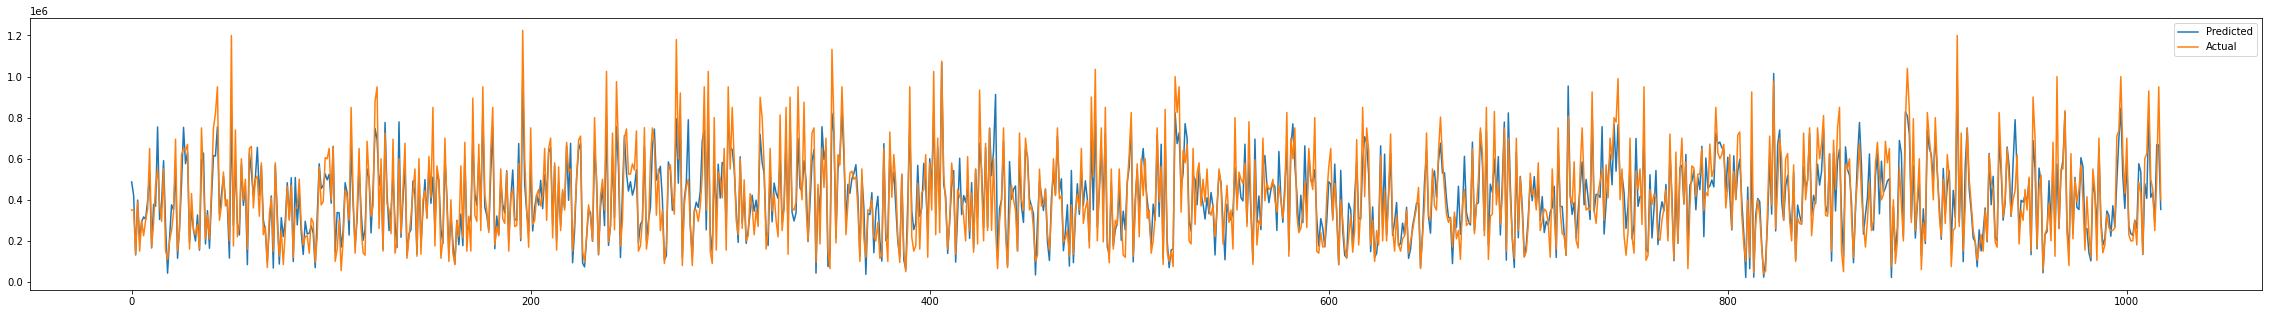

In [168]:
plt.figure(figsize=(40,5))
plt.plot(y_pred_ridge**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

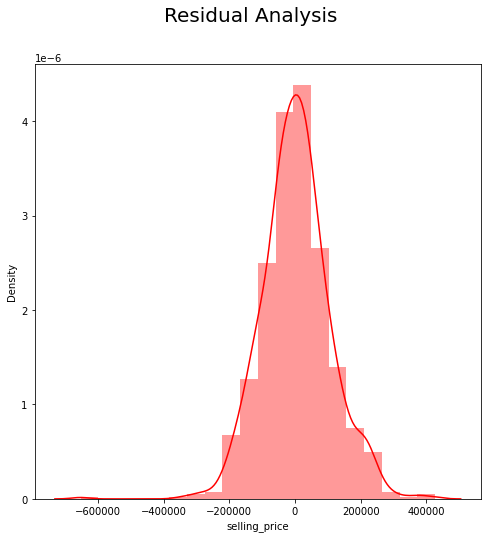

In [169]:
#checking for distribution of residuals 
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot(((y_test**2)- (y_pred_ridge**2)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

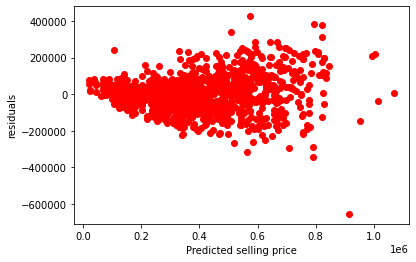

In [170]:
#checking for hetrosceadicity 
### Heteroscadacity
plt.scatter((y_pred_ridge**2),((y_test**2)- (y_pred_test**2)),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

In [171]:
MSE  = mean_squared_error(y_test**2, y_pred_ridge**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test**2, y_pred_ridge**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test**2, y_pred_ridge**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 10824728627.11675
RMSE : 104041.95609040014
R2 : 0.7913601004354041
Adjusted R2 :  0.7892882047098371


All three model are performing approximately similar and there is no significant change while using ridge and lasso regression 